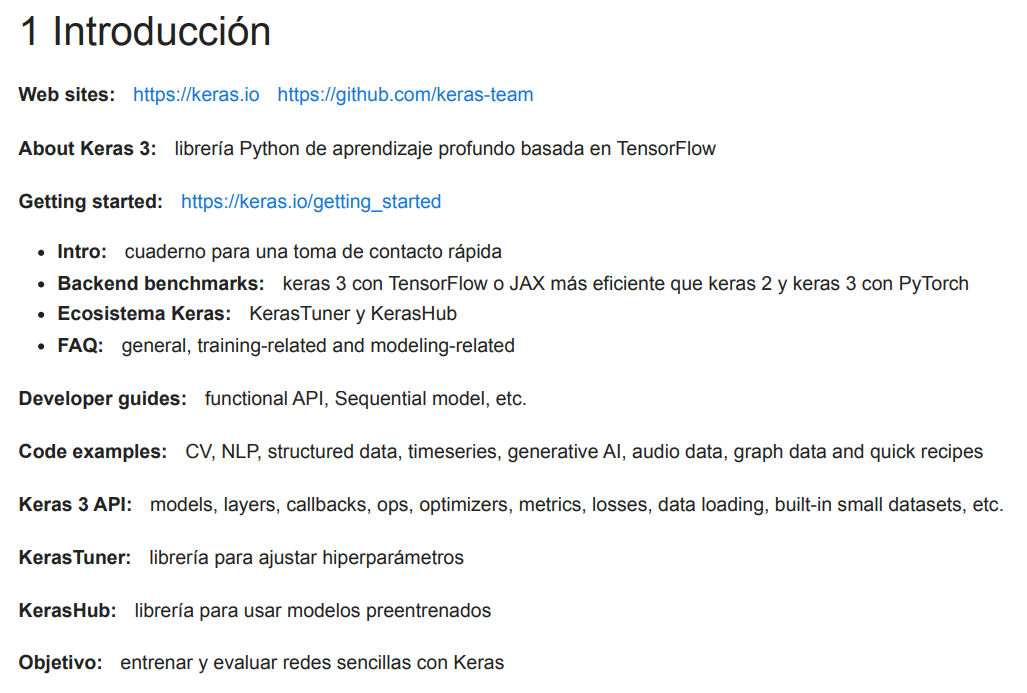

Keras --- Librería de google para el aprendizaje automático.

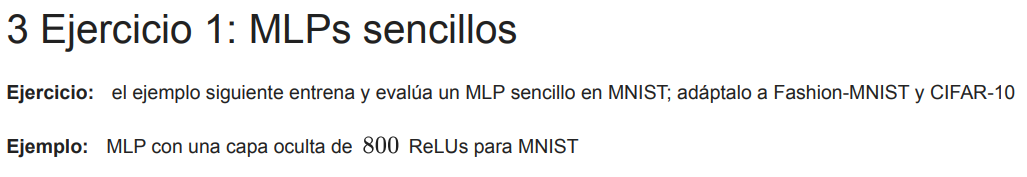

In [ ]:
!pip install silence_tensorflow;
import silence_tensorflow; import keras; keras.utils.set_random_seed(23)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

  Preparing metadata (setup.py) ... done
  Created wheel for silence_tensorflow: filename=silence_tensorflow-1.2.3-py3-none-any.whl size=6749 sha256=ee24b4a99ae36da11f1489eee17e5da199a1d25e465ace46d01d8577c8188dd2
  Stored in directory: /root/.cache/pip/wheels/74/5f/7e/afa8e22bf573d8aa309e5c8aed0d1a327076c5df2e12f68612
Successfully built silence_tensorflow
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784) (60000,) (10000, 784) (10000,)


In [ ]:
M = keras.Sequential([keras.Input(shape=(28*28,)),
 keras.layers.Dense(800, activation='relu'),
 keras.layers.Dense(10, activation='softmax')])
M.compile(loss='crossentropy', optimizer='adam', metrics=['accuracy'])
M.fit(x_train, y_train, epochs=5, verbose=1);

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9039 - loss: 0.3155
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9744 - loss: 0.0813
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9861 - loss: 0.0454
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9915 - loss: 0.0276
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9935 - loss: 0.0218


Entrada 28x28 = 784, capa 800 neuronas a la que le entra 784 inputs a cada una,cada neurona aplica una transformación a = w^t * x, w ∈ ℝ^784, función relu, luego de la transformación y activación lineal sale un valor que va hacia la siguiente capa de 10 neuronas (que será la capa de salida) a la que le entrarán 784 inputs provenientes de la anterior capa con función de activación softmax.

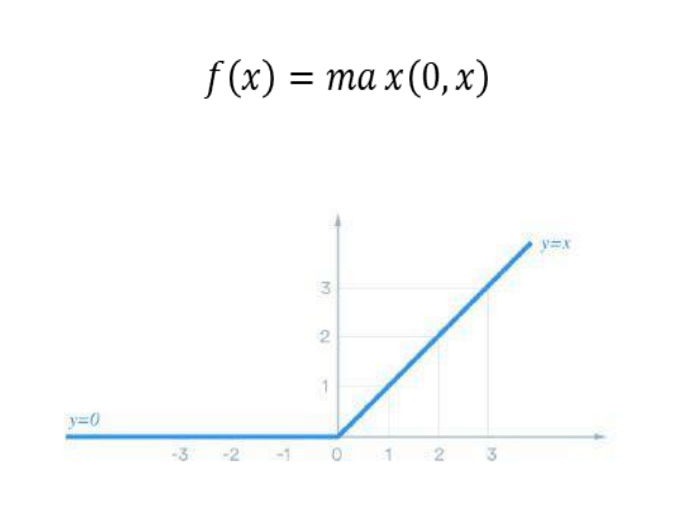

In [ ]:
loss, acc = M.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {loss:.4f} Precisión: {acc:.2%}')

Loss: 0.0768 Precisión: 97.84%


In [ ]:
M.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,908,032 (7.28 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,272,022 (4.85 MB)

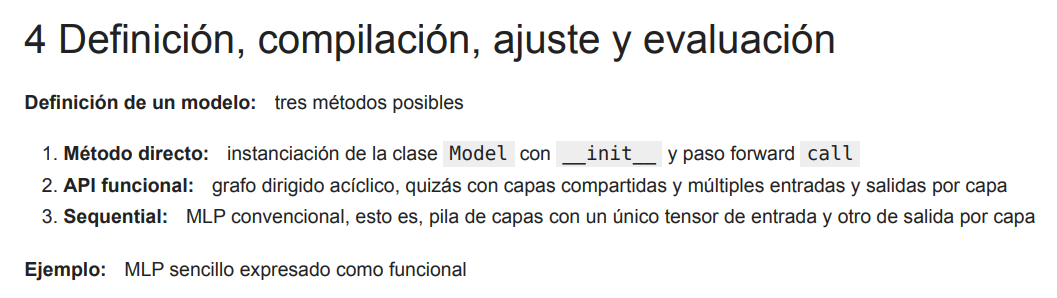

In [ ]:
import silence_tensorflow; import keras; keras.utils.set_random_seed(23)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0
inputs = keras.Input(shape=(28*28,))
x = keras.layers.Dense(800, activation='relu')(inputs)
outputs = keras.layers.Dense(10, activation='softmax')(x)
M = keras.Model(inputs=inputs, outputs=outputs)
M.compile(loss='crossentropy', optimizer='adam', metrics=['accuracy'])
M.fit(x_train, y_train, epochs=5, verbose=0)
print(f'Precisión: {M.evaluate(x_test, y_test, verbose=0)[1]:.2%}')

Precisión: 97.84%


In [ ]:
M.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,908,032 (7.28 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,272,022 (4.85 MB)

In [ ]:
print(f'Número de parámetros de la capa oculta: {784*800 + 800}')
print(f'Número de parámetros de la capa de salida: {800*10 + 10}')

Número de parámetros de la capa oculta: 628000
Número de parámetros de la capa de salida: 8010


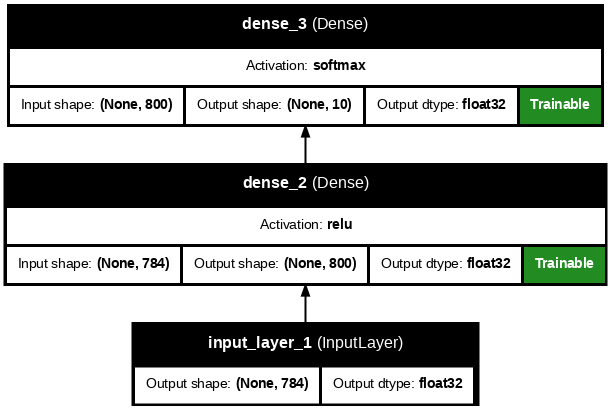

In [ ]:
keras.utils.plot_model(M, show_shapes=True, show_dtype=True, show_layer_names=True, rankdir='BT', dpi=72,
 show_layer_activations=True, show_trainable=True)

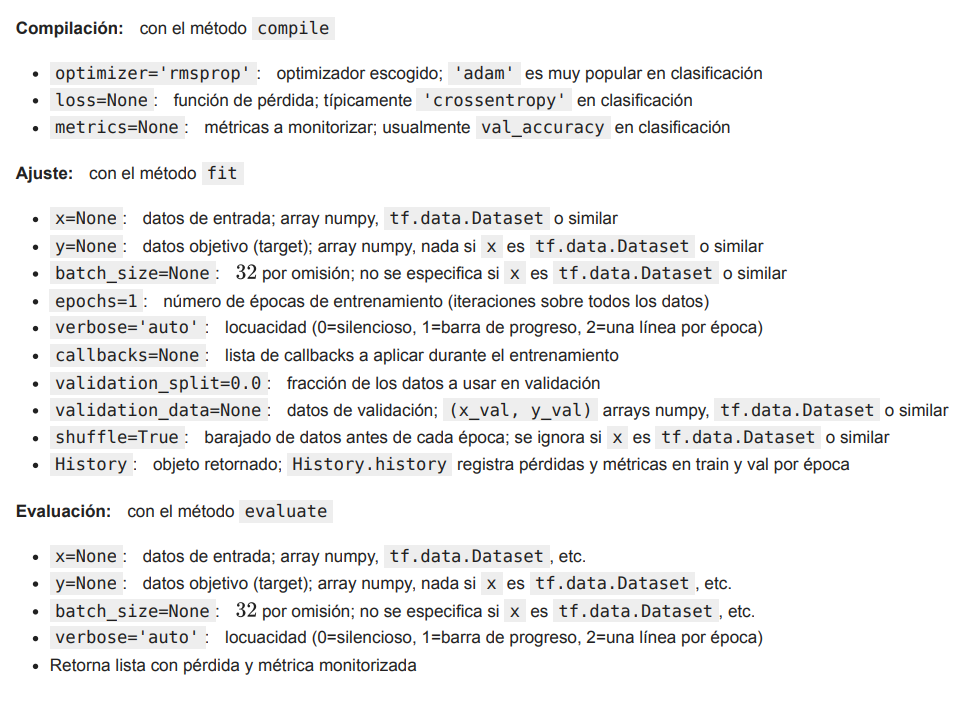

Qué parámetros se le pueden pasar a cada una de las funciones.

En validation_split coges un subconjunto de los datos de entrenamiento para evaluar el modelo en cada época, es como un conjunto de test pero para el entrenamiento.

**Técnicas para evitar el sobreajuste de los Modelos**

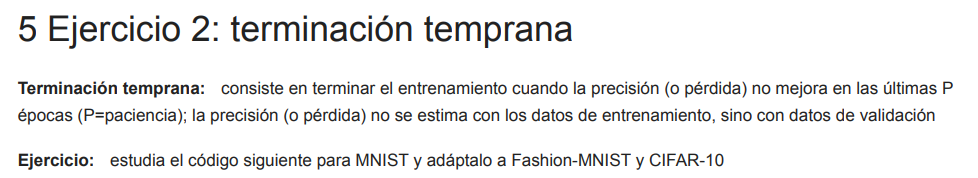

In [ ]:
import silence_tensorflow; import keras; keras.utils.set_random_seed(23)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0
inputs = keras.Input(shape=(28*28,)); x = keras.layers.Dense(800, activation='relu')(inputs)
outputs = keras.layers.Dense(10, activation='softmax')(x); M = keras.Model(inputs=inputs, outputs=outputs)
M.compile(loss='crossentropy', optimizer='adam', metrics=['accuracy'])
early_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
H = M.fit(x_train, y_train, epochs=100, verbose=0, callbacks=[early_cb], validation_split=0.1)
print(f'Precisión: {M.evaluate(x_test, y_test, verbose=1)[1]:.2%}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.0861
Precisión: 97.63%


Con .EarlyStopping le decimos que según 'val_accuracy' y 'patience' = 3, si en 3 épocas seguidas empeora el valor en función de val_accuracy el train del modelo se detenga.

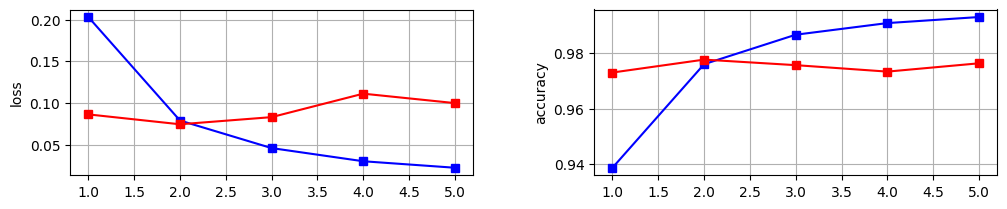

In [ ]:
import numpy as np; import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 2.25)); fig.tight_layout(); plt.subplots_adjust(wspace=0.3)
xx = np.arange(1, len(H.history['loss'])+1); ax = axs[0]; ax.grid(); ax.set_ylabel('loss')
ax.plot(xx, H.history['loss'], 'bs-', xx, H.history['val_loss'], 'rs-'); ax = axs[1]; ax.grid()
ax.set_ylabel('accuracy'); ax.plot(xx, H.history['accuracy'], 'bs-', xx, H.history['val_accuracy'], 'rs-');

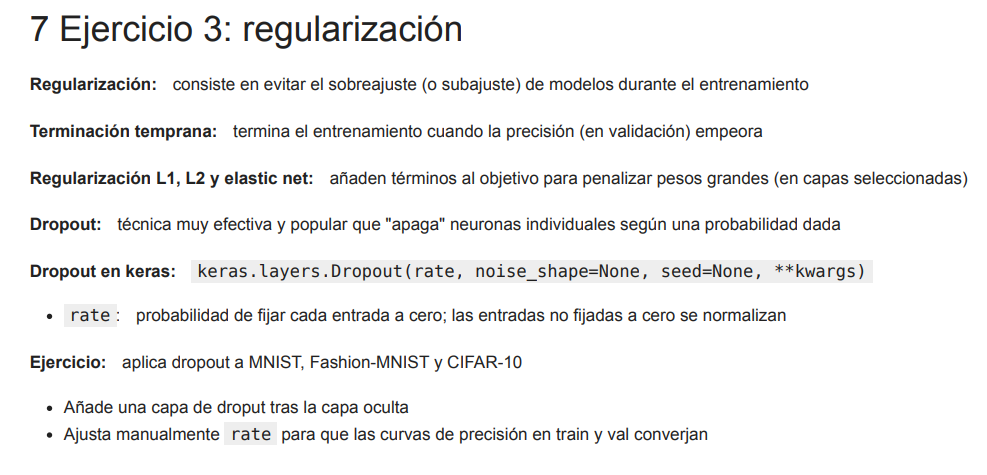

En droput apagamos las neuramos en diferentes épocas, si lo definimos como 0,5 se apagarán la mitad de estas y su propagación no será efectiva.

In [ ]:
import silence_tensorflow; import keras; keras.utils.set_random_seed(23)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0
inputs = keras.Input(shape=(28*28,)); x = keras.layers.Dense(800, activation='relu')(inputs)
x = keras.layers.Dropout(0.5)(x);
outputs = keras.layers.Dense(10, activation='softmax')(x); M = keras.Model(inputs=inputs, outputs=outputs)
M.compile(loss='crossentropy', optimizer='adam', metrics=['accuracy'])
early_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
H = M.fit(x_train, y_train, epochs=100, verbose=0, callbacks=[early_cb], validation_split=0.1)
print(f'Precisión: {M.evaluate(x_test, y_test, verbose=1)[1]:.2%}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9818 - loss: 0.0814
Precisión: 98.48%


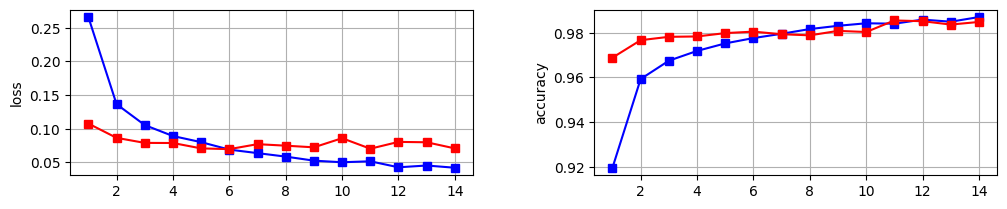

In [ ]:
import numpy as np; import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 2.25)); fig.tight_layout(); plt.subplots_adjust(wspace=0.3)
xx = np.arange(1, len(H.history['loss'])+1); ax = axs[0]; ax.grid(); ax.set_ylabel('loss')
ax.plot(xx, H.history['loss'], 'bs-', xx, H.history['val_loss'], 'rs-'); ax = axs[1]; ax.grid()
ax.set_ylabel('accuracy'); ax.plot(xx, H.history['accuracy'], 'bs-', xx, H.history['val_accuracy'], 'rs-');